# VEM 2. Szorgalmi HF

## Importok:

In [2]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)

## Adatok:

In [3]:
#Data 1222

code_2=int(input("KÓD2="))
code_3=int(input("KÓD3="))
code_4=int(input("KÓD4="))

E=180 #GPa
ν=0.4 #[-]

#Code 2

if code_2==1:
    a=30
elif code_2==2:
    a=25
elif code_2==3:
    a=20
elif code_2==4:
    a=35

#Code 3

if code_3==1:
    b=80
    p=450
elif code_3==2:
    b=75
    p=350
elif code_3==3:
    b=70
    p=250
elif code_3==4:
    b=85
    p=550

#Code 4

if code_4==1:
    c=130
    t=8
elif code_4==2:
    c=120
    t=6
elif code_4==3:
    c=100
    t=4
elif code_4==4:
    c=140
    t=10


#a=float(input("a=")) #mm (25)
#b=float(input("b=")) #mm (75)
#c=float(input("c=")) #mm (120)
#p=float(input("p=")) #MPa (350)
#t=float(input("t=")) #mm (6)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
t=t/1000
p=p*10**6

## A koordináta transzformáció Jacobi mátrixának meghatározása:

In [4]:
#A koordináta transzformáció Jacobi mátrixának meghatározása:

print("A koordináta transzformáció Jacobi mátrixai:")

#Symbols

ξ,η=sp.symbols("ξ,η")

#Forma függvények

N_1=1/4*(1-ξ)*(1-η)
N_2=1/4*(1+ξ)*(1-η)
N_3=1/4*(1+ξ)*(1+η)
N_4=1/4*(1-ξ)*(1+η)

N=[N_1,N_2,N_3,N_4]

#Trafó

def Jacobian(x_vec,y_vec):
    J_11=0
    J_12=0
    J_21=0
    J_22=0
    for i in range(len(N)):
        J_11+=sp.diff(N[i],ξ)*x_vec[i]
        J_12+=sp.diff(N[i],ξ)*y_vec[i]
        J_21+=sp.diff(N[i],η)*x_vec[i]
        J_22+=sp.diff(N[i],η)*y_vec[i]
    J=sp.Matrix([[J_11,J_12],[J_21,J_22]])
    return J

print("\nAz elemek Jacobi Mátrixai:")

#1.elem

x_1=[0,c/3,c/3,0]
y_1=[0,0,b-a,b]

J_1=Jacobian(x_1,y_1)

print("\nJ_1=")
display(J_1)

#2.elem

x_2=[c/3,c-a,c,0]
y_2=[b-a,b-a,b,b]

J_2=Jacobian(x_2,y_2)

print("\nJ_2=")
display(J_2)

#3.elem

x_3=[c-a,c,c,c-a]
y_3=[0,0,b,b-a]

J_3=Jacobian(x_3,y_3)

print("\nJ_3=")
display(J_3)

A koordináta transzformáció Jacobi mátrixai:

Az elemek Jacobi Mátrixai:

J_1=


C:\Users\nemet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nemet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nemet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function

⎡0.02  -0.0075⋅η - 0.0075⎤
⎢                        ⎥
⎣ 0     0.035 - 0.0075⋅ξ ⎦


J_2=


⎡0.0175⋅η + 0.0425    0  ⎤
⎢                        ⎥
⎣0.0175⋅ξ - 0.0025  0.015⎦


J_3=


⎡0.015  0.0075⋅η + 0.0075⎤
⎢                        ⎥
⎣  0    0.0075⋅ξ + 0.035 ⎦

## Formafüggvények deriváltjai:


Formafüggvények deriváltjai:

B mátrixok értékei:

B_1=


⎡-0.006875⋅η - 0.00375⋅ξ + 0.010625                                      0.010
⎢──────────────────────────────────                  0                   ─────
⎢        0.00015⋅ξ - 0.0007                                                   
⎢                                                                             
⎢                                               0.25⋅(1 - ξ)                  
⎢                0                            ────────────────                
⎢                                             0.0075⋅ξ - 0.035                
⎢                                                                             
⎢           0.25⋅(1 - ξ)             -0.006875⋅η - 0.00375⋅ξ + 0.010625       
⎢         ────────────────           ──────────────────────────────────       
⎣         0.0075⋅ξ - 0.035                   0.00015⋅ξ - 0.0007               

625⋅η + 0.00375⋅ξ - 0.006875                                     -(0.010625⋅η 
────────────────────────────                  0    

B_2=


⎡         0.25⋅(η - 1)                                                   0.25⋅
⎢      ─────────────────                       0                      ────────
⎢      0.0175⋅η + 0.0425                                              0.0175⋅η
⎢                                                                             
⎢                                -0.00375⋅η + 0.015⋅ξ - 0.01125               
⎢              0                 ──────────────────────────────               
⎢                                   0.0002625⋅η + 0.0006375                   
⎢                                                                             
⎢-0.00375⋅η + 0.015⋅ξ - 0.01125           0.25⋅(η - 1)           -(0.005⋅η + 0
⎢──────────────────────────────        ─────────────────         ─────────────
⎣   0.0002625⋅η + 0.0006375            0.0175⋅η + 0.0425           0.0002625⋅η

(1 - η)                                                 0.25⋅(η + 1)          
─────────                     0                    

B_3=


⎡2.16840434497101e-19⋅η⋅ξ + 0.010625⋅η - 0.00375⋅ξ - 0.006875                 
⎢────────────────────────────────────────────────────────────                 
⎢                   0.0001125⋅ξ + 0.000525                                    
⎢                                                                             
⎢                                                                             
⎢                             0                                               
⎢                                                                             
⎢                                                                             
⎢                        0.25⋅(ξ - 1)                          2.1684043449710
⎢                      ────────────────                        ───────────────
⎣                      0.0075⋅ξ + 0.035                                       

                                               -2.16840434497101e-19⋅η⋅ξ - 0.0
              0                                ────


 D mátrix alakja:

D=


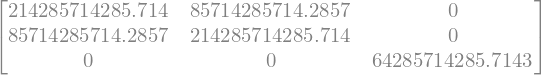

In [5]:
#Formafüggvények deriváltjai

print("\nFormafüggvények deriváltjai:")

def N_dx_dy(N_i,J_i):
    N_i_dξ_dη=sp.Matrix([[sp.diff(N_i,ξ)], [sp.diff(N_i,η)]])
    N_i_dx_dy=J_i.inv()*N_i_dξ_dη
    return  N_i_dx_dy


J_tensor=[J_1,J_2,J_3]

N_i_j_dx=sp.Matrix(np.zeros(12))
N_i_j_dy=sp.Matrix(np.zeros(12))

for j in range(len(J_tensor)):
    for i in range(len(N)):
        N_i_dx_dy=N_dx_dy(N[i],J_tensor[j])
        N_i_j_dx[i+4*j]=N_i_dx_dy[0]
        N_i_j_dy[i+4*j]=N_i_dx_dy[1]

#display(N_i_j_dx)
#display(N_i_j_dy) #sztem ezek jok

def sub_N_i(N_i_di,n):
    N_di=sp.Matrix(np.zeros(4))
    for i in range(len(N_di)):
        N_di[i]=N_i_di[i+(n-1)*4]
    
    return N_di
    
#Subvectors

N_dx_1=sub_N_i(N_i_j_dx,1)
N_dy_1=sub_N_i(N_i_j_dy,1)

N_dx_2=sub_N_i(N_i_j_dx,2)
N_dy_2=sub_N_i(N_i_j_dy,2)

N_dx_3=sub_N_i(N_i_j_dx,3)
N_dy_3=sub_N_i(N_i_j_dy,3)

#B mátrixok

print("\nB mátrixok értékei:")

def B_i(N_dx,N_dy):
    B=sp.Matrix([[N_dx[0],0,N_dx[1],0,N_dx[2],0,N_dx[3],0],
                [0,N_dy[0],0,N_dy[1],0,N_dy[2],0,N_dy[3]],
                [N_dy[0],N_dx[0],N_dy[1],N_dx[1],N_dy[2],N_dx[2],N_dy[3],N_dx[3]]])
    return B

#Elemenként numerikusan

B_1=B_i(N_dx_1,N_dy_1)

print("\nB_1=")
display(sp.simplify(B_1))

B_2=B_i(N_dx_2,N_dy_2)

print("B_2=")
display(sp.simplify(B_2))

B_3=B_i(N_dx_3,N_dy_3)

print("B_3=")
display(sp.simplify(B_3))

#D mátrix

print("\n D mátrix alakja:")

if code_2==1 or code_2==3:
    D=E/(1-ν**2)*sp.Matrix([[1,ν,0],[ν,1,0],[0,0,(1-ν)/2]])

if code_2==2 or code_2==4:
    D=E/((1+ν)*(1-2*ν))*sp.Matrix([[1-ν,ν,0],[ν,1-ν,0],[0,0,(1-2*ν)/2]])

print("\nD=")
display(D)

## Merevségi mátrixok meghatározása:

Merevségi mátrixok meghatározása:

K_1=


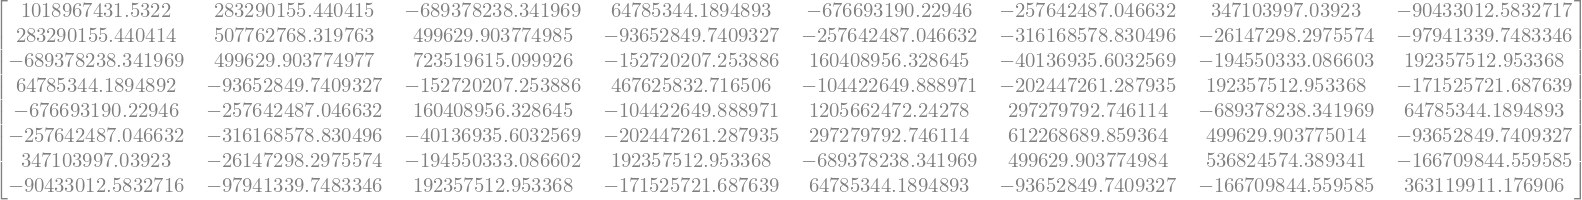

K_2=


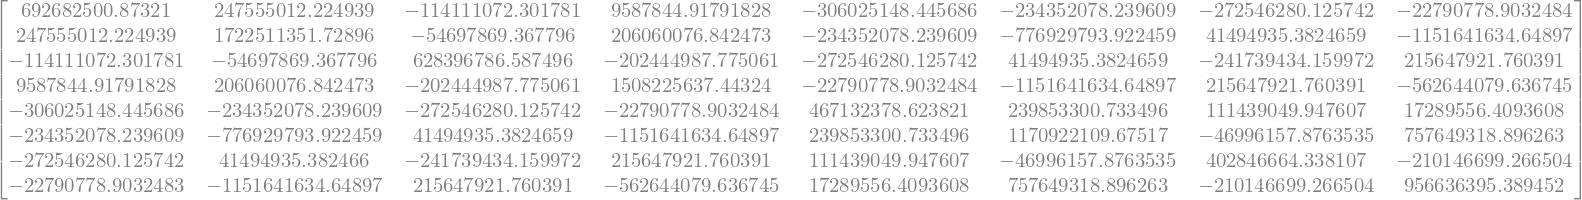

K_3=


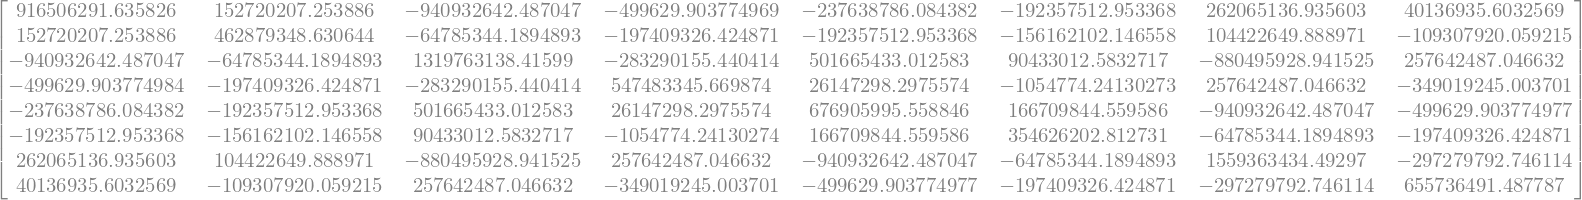

In [6]:
#Merevségi mátrixok meghatározása

print("Merevségi mátrixok meghatározása:")

#K mátrixok

def K_i(B_i,J_i):
    F_i=Transpose(B_i)*D*B_i*J_i.det()*t
    K_i=F_i.subs({ξ:-1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:-1/np.sqrt(3)})+F_i.subs({ξ:1/np.sqrt(3), η:1/np.sqrt(3)})+F_i.subs({ξ:-1/np.sqrt(3), η:1/np.sqrt(3)})
    return K_i

#Elemenként

K_1=K_i(B_1,J_1)
print("\nK_1=")
display(K_1)

K_2=K_i(B_2,J_2)
print("K_2=")
display(K_2)

K_3=K_i(B_3,J_3)
print("K_3=")
display(K_3)

## Globális merevségi mátrix meghatározása:


Globális merevségi mátrix meghatározása:

K_glob=


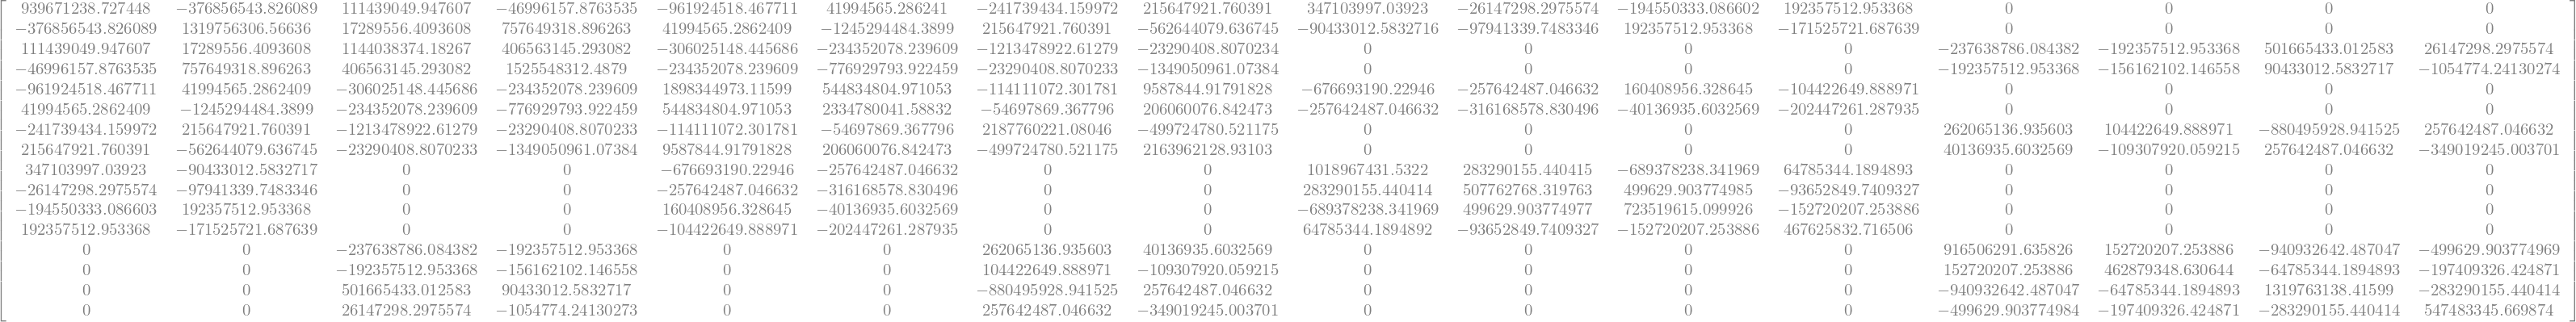

In [7]:
#Globális merevségi mátrix

print("\nGlobális merevségi mátrix meghatározása:")

#Elem-csomópont hozzárendelés

ecs = sp.Matrix([[5,6,3,1],[3,4,2,1],[7,8,2,4]])

#Szabadsági fokokat tartalmazó vektorok

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1], 2*ecs[0,2]-1, 2*ecs[0,2], 2*ecs[0,3]-1, 2*ecs[0,3]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1], 2*ecs[1,2]-1, 2*ecs[1,2], 2*ecs[1,3]-1, 2*ecs[1,3]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1], 2*ecs[2,2]-1, 2*ecs[2,2], 2*ecs[2,3]-1, 2*ecs[2,3]]


def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = sp.Matrix(ExtMatrix(K_1, eDOF1, 16) + ExtMatrix(K_2, eDOF2, 16) + ExtMatrix(K_3, eDOF3, 16))

print("\nK_glob=")
display(K_glob)

## Globális terhelés és elmozdulásvektor meghatározása:

Globális terhelésvektor:

F_glob=


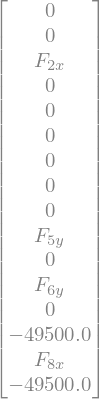

Globális elmozdulásvektor:

U_glob=


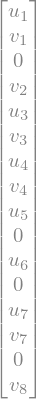

In [8]:
#Globális terhelésvektor

print("Globális terhelésvektor:")

#Symbols

F2_x,F8_x,F5_y,F6_y=sp.symbols("F2_x,F8_x,F5_y,F6_y")

F_glob=sp.Matrix(([0],[0],[F2_x],[0],[0],[0],[0],[0],[0],[F5_y],[0],[F6_y],[0],[-p/2*a*t],[F8_x],[-p/2*a*t]))

print("\nF_glob=")
display(F_glob)

#Globális elmozdulásvektor

print("Globális elmozdulásvektor:")

u_1,v_1,u_2,v_2,u_3,v_3,u_4,v_4,u_5,v_5,u_6,v_6,u_7,v_7,u_8,v_8=sp.symbols("u_1,v_1,u_2,v_2,u_3,v_3,u_4,v_4,u_5,v_5,u_6,v_6,u_7,v_7,u_8,v_8")

#Peremfeltételek

v_5=0
v_6=0
u_2=0
u_8=0

U_glob=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5],[u_6],[v_6],[u_7],[v_7],[u_8],[v_8]])

print("\nU_glob=")
display(U_glob)

## Kondenzált mennyiségek meghatározása:

A kondenzált merevségi mátrix:

K_kond=


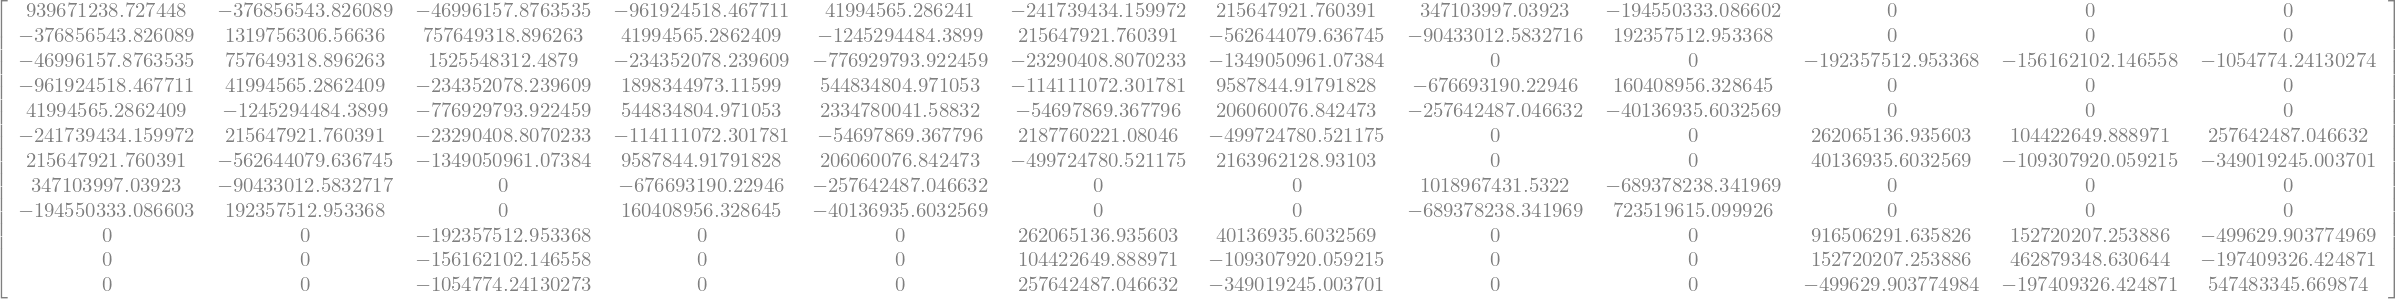


A kondenzált terhelés vektor:

F_kond=


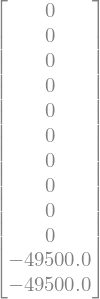


A kondenzált elmozdulás vektor:

U_kond=


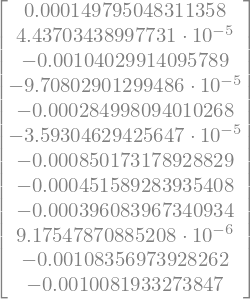

In [9]:
#Kondenzált mennyiségek

#Kondenzalt merevsegi matrix

print("A kondenzált merevségi mátrix:")

def SubMatrix(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mx[i,j] = Mx[rows[i]-1,rows[j]-1]
    return sp.Matrix(mx)

freeDoF=sp.Matrix([[1,2,4,5,6,7,8,9,11,13,14,16]])

K_kond=SubMatrix(K_glob,freeDoF)

print("\nK_kond=")

display(K_kond)

#Kondenzalt terheles vektor

print("\nA kondenzált terhelés vektor:")

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

F_kond=SubVector(F_glob,freeDoF)

print("\nF_kond=")

display(F_kond)

#Kondenzalt elmozdulas vektor

print("\nA kondenzált elmozdulás vektor:")

U_kond=sp.Matrix(np.matmul(sp.Inverse(K_kond),F_kond))

print("\nU_kond=")

display(U_kond)

## Elmozdulás komponensek meghatározása:

In [10]:
#Elmozdulás komponensek

print("Az elmozdulás komponensek:")

u_1=U_kond[0]
v_1=U_kond[1]
v_2=U_kond[2]
u_3=U_kond[3]
v_3=U_kond[4]
u_4=U_kond[5]
v_4=U_kond[6]
u_5=U_kond[7]
u_6=U_kond[8]
u_7=U_kond[9]
v_7=U_kond[10]
v_8=U_kond[11]

print("\nu_1=",u_1*10**6,"[μm]")
print("v_1=",v_1*10**6,"[μm]")
print("v_2=",v_2*10**6,"[μm]")
print("u_3=",u_3*10**6,"[μm]")
print("v_3=",v_3*10**6,"[μm]")
print("u_4=",u_4*10**6,"[μm]")
print("v_4=",v_4*10**6,"[μm]")
print("u_5=",u_5*10**6,"[μm]")
print("u_6=",u_6*10**6,"[μm]")
print("u_7=",u_7*10**6,"[μm]")
print("v_7=",v_7*10**6,"[μm]")
print("v_8=",v_8*10**6,"[μm]")

#Eredő elmozdulások:

print("\nEredő elmozdulások:")

Δ_1=(u_1**2+v_1**2)**(1/2)
print("\nΔ_1=",Δ_1*10**6,"[μm]")

Δ_2=(u_2**2+v_2**2)**(1/2)
print("Δ_2=",Δ_2*10**6,"[μm]")

Δ_3=(u_3**2+v_3**2)**(1/2)
print("Δ_3=",Δ_3*10**6,"[μm]")

Δ_4=(u_4**2+v_4**2)**(1/2)
print("Δ_4=",Δ_4*10**6,"[μm]")

Δ_5=(u_5**2+v_5**2)**(1/2)
print("Δ_5=",Δ_5*10**6,"[μm]")

Δ_6=(u_6**2+v_6**2)**(1/2)
print("Δ_6=",Δ_6*10**6,"[μm]")

Δ_7=(u_7**2+v_7**2)**(1/2)
print("Δ_7=",Δ_7*10**6,"[μm]")

Δ_8=(u_8**2+v_8**2)**(1/2)
print("Δ_8=",Δ_8*10**6,"[μm]")

Az elmozdulás komponensek:

u_1= 149.795048311358 [μm]
v_1= 44.3703438997731 [μm]
v_2= -1040.29914095789 [μm]
u_3= -97.0802901299486 [μm]
v_3= -284.998094010268 [μm]
u_4= -35.9304629425647 [μm]
v_4= -850.173178928829 [μm]
u_5= -451.589283935408 [μm]
u_6= -396.083967340934 [μm]
u_7= 9.17547870885208 [μm]
v_7= -1083.56973928262 [μm]
v_8= -1008.19332738470 [μm]

Eredő elmozdulások:

Δ_1= 156.228307026563 [μm]
Δ_2= 1040.29914095789 [μm]
Δ_3= 301.078887205995 [μm]
Δ_4= 850.932096196410 [μm]
Δ_5= 451.589283935408 [μm]
Δ_6= 396.083967340934 [μm]
Δ_7= 1083.60858675933 [μm]
Δ_8= 1008.19332738470 [μm]


## Globális elmozdulás és terhelésvektor numerikus értékei:

A globális elmozdulásvektor:

U_glob=


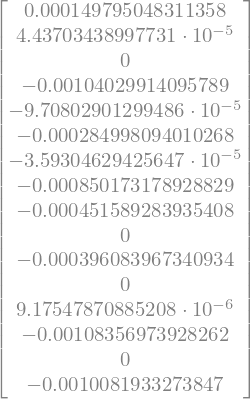


Globális terhelésvektor:

F_glob=


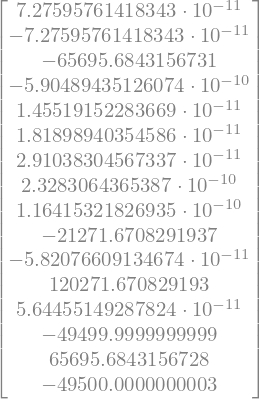


A terhelés komponensek:

F2_x= -65.6956843156731 [kN]
F5_y= -21.2716708291937 [kN]
F6_y= 120.271670829193 [kN]
F8_x= 65.6956843156728 [kN]


In [11]:
#Globális elmozdulásvektor

print("A globális elmozdulásvektor:")

U_glob=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5],[u_6],[v_6],[u_7],[v_7],[u_8],[v_8]])

print("\nU_glob=")
display(U_glob)

#Globalis terhelesvektor

print("\nGlobális terhelésvektor:")

F_glob=sp.Matrix(np.matmul(K_glob,U_glob))

print("\nF_glob=")
display(F_glob)

#Terheléskomponensek meghatározása

print("\nA terhelés komponensek:")

F2_x=F_glob[2]
F5_y=F_glob[9]
F6_y=F_glob[11]
F8_x=F_glob[14]

print("\nF2_x=",F2_x/1000,"[kN]")
print("F5_y=",F5_y/1000,"[kN]")
print("F6_y=",F6_y/1000,"[kN]")
print("F8_x=",F8_x/1000,"[kN]")

## Alakváltozási energiák meghatározása:

In [12]:
#Alakváltozási energiák

print("Alakváltozási energiák:")

def SubVector(Mx, rows):
    n = len(rows)
    mx = np.zeros((n, 1))
    for i in range(n):
        mx[i, 0] = Mx[rows[i]-1, 0]
    return sp.Matrix(mx)

def U_i(K_i,eDOFi):
    u_vec=SubVector(U_glob,eDOFi)
    U_i=1/2*Transpose(u_vec)*K_i*u_vec
    return U_i


print("\nAz 1. elemben ébredő alakváltozási energia:")

U_1=U_i(K_1,eDOF1)
print("\nU_1=",U_1[0],"[J]")


print("\nA 2. elemben ébredő alakváltozási energia:")

U_2=U_i(K_2,eDOF2)
print("\nU_2=",U_2[0],"[J]")

print("\nA 3. elemben ébredő alakváltozási energia:")

U_3=U_i(K_3,eDOF3)
print("\nU_3=",U_3[0],"[J]")

Alakváltozási energiák:

Az 1. elemben ébredő alakváltozási energia:

U_1= 17.6059762092597 [J]

A 2. elemben ébredő alakváltozási energia:

U_2= 19.6909314219318 [J]

A 3. elemben ébredő alakváltozási energia:

U_3= 14.4742282688248 [J]


## Súlyponti feszültségek értékei:

In [18]:
#Súlyponti feszültségek értékei

print("Súlyponti feszültségek értékei:")

x,y=sp.symbols("x,y")

def σ_Si(B_i,eDOFi,x_vec,y_vec):
    #Transform

    x_i=0
    y_i=0

    for i in range(len(x_vec)):
        x_i+=N[i]*x_vec[i]
        y_i+=N[i]*y_vec[i]

    eq_1=sp.Eq(x_i,x)
    eq_2=sp.Eq(y_i,y)
    T_i=sp.Matrix(sp.solve((eq_1,eq_2),(ξ,η)))  
    
    #S_i

    n=len(x_vec)
    A_i=0
    x_s_i=0
    y_s_i=0

    for i in range(n-1):
        A_i+=1/2*(x_vec[i]*y_vec[i+1]-x_vec[i+1]*y_vec[i])
        x_s_i+=(x_vec[i]+x_vec[i+1])*(x_vec[i]*y_vec[i+1]-x_vec[i+1]*y_vec[i])
        y_s_i+=(y_vec[i]+y_vec[i+1])*(x_vec[i]*y_vec[i+1]-x_vec[i+1]*y_vec[i])

    A_i+=1/2*(x_vec[n-1]*y_vec[0]-x_vec[0]*y_vec[n-1])    
    x_s_i+=(x_vec[n-1]+x_vec[0])*(x_vec[n-1]*y_vec[0]-x_vec[0]*y_vec[n-1])
    y_s_i+=(y_vec[n-1]+y_vec[0])*(y_vec[n-1]*y_vec[0]-x_vec[0]*y_vec[n-1])
    
    x_s_i/=6*A_i
    y_s_i/=6*A_i

    display(y_s_i)

    #σ_Si

    u_vec=SubVector(U_glob,eDOFi)
    ξ_s=T_i[0].subs({x:x_s_i, y:y_s_i})
    η_s=T_i[1].subs({x:x_s_i, y:y_s_i})
    B_Si=B_i.subs({ξ:ξ_s, η:η_s})
    σ_Si=D*B_Si*u_vec
    
    return σ_Si

#Elemenként

print("\nAz 1. elem súlypontjában ébredő feszültség értékek:")

σ_S1=σ_Si(B_1,eDOF1,x_1,y_1)

print("\nσ_S1_x=",σ_S1[0]*10**(-6),"[MPa]")
print("σ_S1_y=",σ_S1[1]*10**(-6),"[MPa]")
print("𝜏_S1_xy=",σ_S1[2]*10**(-6),"[MPa]")

print("\nA 2. elem súlypontjában ébredő feszültség értékek:")

σ_S2=σ_Si(B_2,eDOF2,x_2,y_2)

print("\nσ_S2_x=",σ_S2[0]*10**(-6),"[MPa]")
print("σ_S2_y=",σ_S2[1]*10**(-6),"[MPa]")
print("𝜏_S2_xy=",σ_S2[2]*10**(-6),"[MPa]")

print("\nA 3. elem súlypontjában ébredő feszültség értékek:")

σ_S3=σ_Si(B_3,eDOF3,x_3,y_3)

print("\nσ_S3_x=",σ_S3[0]*10**(-6),"[MPa]")
print("σ_S3_y=",σ_S3[1]*10**(-6),"[MPa]")
print("𝜏_S3_xy=",σ_S3[2]*10**(-6),"[MPa]")

Súlyponti feszültségek értékei:

Az 1. elem súlypontjában ébredő feszültség értékek:
